In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Bank Customer Churn Prediction.csv')
#df.dtypes
one_hot_country = pd.get_dummies(df.country, prefix='country')
one_hot_gender = pd.get_dummies(df.gender, prefix='gender')
df = df.drop(["country","gender"],axis=1)
df = pd.concat([df, one_hot_country, one_hot_gender], axis=1)

df = df.drop(['customer_id'], axis='columns')
X = df.drop(['churn'], axis='columns')
y = df['churn']
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Input


'''
model = Sequential()
model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
'''

num_classes = 2
input_shape = (X_train.shape[1],)
model = Sequential([
Input(shape=input_shape),
Dense(100, activation="relu"),
Dense(100, activation="relu"),
Dense(2, activation="softmax")
])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 100)            │         1,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           202 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,702 (45.71 KB)

 Trainable params: 11,702 (45.71 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))
class_weights


{0: np.float64(0.6292276230926538), 1: np.float64(2.4345709068776626)}

In [12]:
y_train.value_counts()

churn
0    6357
1    1643
Name: count, dtype: int64

In [13]:
pd.get_dummies(y_train)

,0,1
213,True,False
9905,False,True
7233,True,False
6473,True,False
7791,True,False
...,...,...
7292,True,False
6639,True,False
5692,True,False
8233,True,False


In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam')
history = model.fit(X_train, pd.get_dummies(y_train), epochs=100, validation_split=0.2, class_weight=class_weights)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6509 - val_loss: 0.6771
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5876 - val_loss: 0.4528
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - loss: 0.5524 - val_loss: 0.4477
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - loss: 0.5152 - val_loss: 0.4463
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - loss: 0.4748 - val_loss: 0.4830
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4715 - val_loss: 0.4432
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - loss: 0.4578 - val_loss: 0.4867
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - loss: 0.4603 - val_loss: 0.4905
Epoch 9/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - loss: 0.4572 - val_loss: 0.4515
Epoch 10/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4611 - val_loss: 0.4889
Epoch 11/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - loss: 0.4315 - val_loss: 0.4657
Epoch 12/100
200/200 ━━━━━━

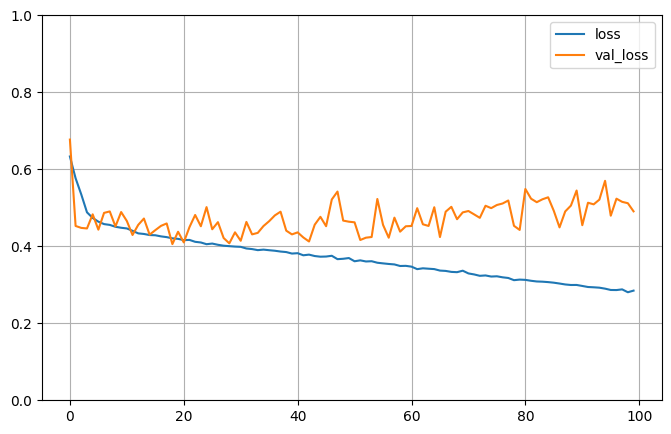

In [15]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [16]:
y_pred = model.predict(X_test)
#y_pred[y_pred >= 0.5] = 1
#y_pred[y_pred < 0.5] = 0
y_pred = [np.argmax(p) for p in y_pred]
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step
[[1386  220]
 [ 170  224]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      1606
           1       0.50      0.57      0.53       394

    accuracy                           0.81      2000
   macro avg       0.70      0.72      0.71      2000
weighted avg       0.81      0.81      0.81      2000

